In [1]:
# Import libraries
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

In [2]:
rgb_df = pd.read_csv("image_array.csv", header=None)

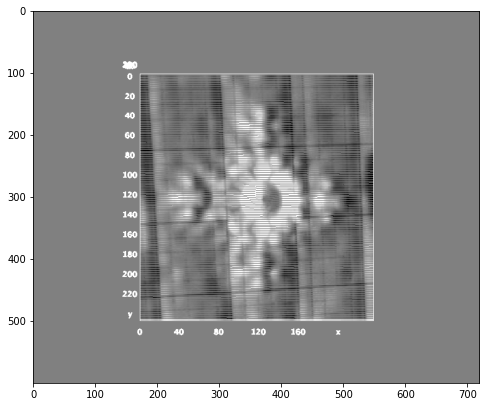

In [3]:
rgb_arr = rgb_df.values
fig = plt.figure()
fig.set_size_inches(8, 8)
ax = fig.add_subplot(111)

ax.imshow(rgb_arr, cmap="gray")

plt.show()

In [12]:
rgb = (rgb_arr[100:475, 175:550]) ** 2

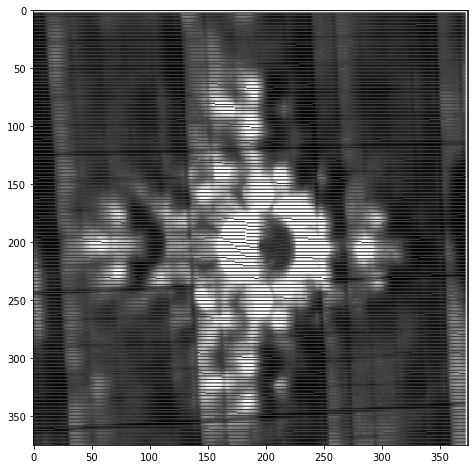

In [13]:
fig = plt.figure()
fig.set_size_inches(8, 8)
ax = fig.add_subplot(111)

ax.imshow(rgb, cmap="gray")

plt.show()

In [14]:
canvas = np.zeros(rgb.shape)
for i in np.arange(rgb.shape[0]):
    for j in np.arange(rgb.shape[1]):
        canvas[i][j] = rgb[(i + rgb.shape[0] // 2) % rgb.shape[0]][(j + rgb.shape[1] // 2) % rgb.shape[1]]
canvas

array([[65025., 65025., 65025., ..., 65025., 65025., 65025.],
       [65025., 65025., 65025., ..., 65025., 65025., 65025.],
       [16384., 16384., 16384., ..., 16384., 16384., 16384.],
       ...,
       [65025., 65025., 65025., ..., 65025., 65025., 65025.],
       [65025., 65025., 65025., ..., 16384., 65025., 65025.],
       [16384., 16384., 16384., ..., 65025., 16384., 16384.]])

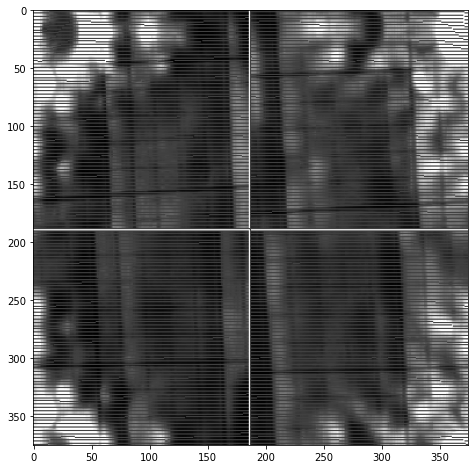

In [15]:
fig = plt.figure()
fig.set_size_inches(8, 8)
ax = fig.add_subplot(111)

ax.imshow(canvas, cmap="gray")

plt.show()

In [16]:
np.absolute(fft.ifft(canvas))

array([[25670.032     ,  9357.38609384,  3825.49293112, ...,
         2919.69655378,  3825.49293112,  9357.38609384],
       [18099.09066667,  1452.29279883,  1698.69410969, ...,
         1425.49148702,  1698.69410969,  1452.29279883],
       [23823.21066667,  7225.30239281,  3441.9672309 , ...,
         2803.6670754 ,  3441.9672309 ,  7225.30239281],
       ...,
       [27325.66133333, 10875.93131945,  3973.46853849, ...,
         2130.80045434,  3973.46853849, 10875.93131945],
       [18126.59466667,  1480.21249507,  1726.3888973 , ...,
         1456.65353049,  1726.3888973 ,  1480.21249507],
       [24644.06666667,  8349.90713172,  3308.05004877, ...,
         1923.13552583,  3308.05004877,  8349.90713172]])

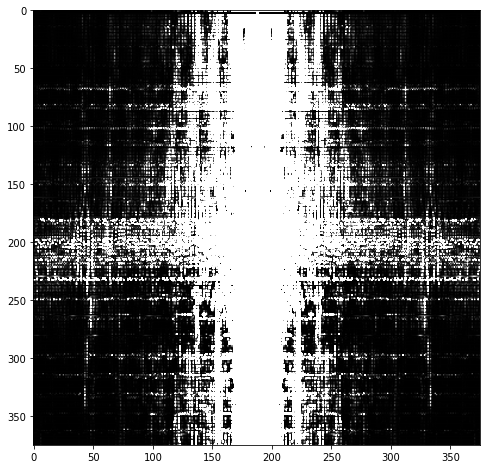

In [53]:
aperture = np.absolute(fft.ifft(canvas))
aperture = aperture / np.sqrt(np.sum(aperture ** 2))

apcanvas = np.zeros(aperture.shape)
for i in np.arange(aperture.shape[0]):
    for j in np.arange(aperture.shape[1]):
        apcanvas[i][j] = aperture[(i + rgb.shape[0] // 2) % rgb.shape[0]][(j + rgb.shape[1] // 2) % rgb.shape[1]]

fig = plt.figure()
fig.set_size_inches(8, 8)
ax = fig.add_subplot(111)

ax.imshow(apcanvas ** 10, cmap="gray", interpolation="bilinear", aspect='auto', vmax=10**-33)

plt.show()